In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
univ = [
    # --- TECHNOLOGY ---
    'MSFT', 'AAPL', 'INTC', 'CSCO', 'ORCL', 'IBM', 'ADBE', 'TXN', 'NVDA', 'QCOM',
    'AMAT', 'ADI', 'MU', 'LRCX', 'KLAC', 'AMD', 'APH', 'GLW', 'HPQ', 'MSI',
    'ADP', 'PAYX', 'FISV', 'FIS', 'CTSH', 'INTU', 'ADSK', 'SNPS', 'CDNS', 'MCHP',
    'STM', 'UMC', 'TSM', 'ASX', 'TEL', 'TER', 'NTAP', 'STX', 'WDC', 'ZBRA',
    'TRMB', 'TYL', 'AKAM', 'VRSN',

    # --- HEALTHCARE ---
    'JNJ', 'PFE', 'MRK', 'LLY', 'UNH', 'ABT', 'BMY', 'AMGN', 'GILD', 'BIIB',
    'SYK', 'MDT', 'BAX', 'BDX', 'CVS', 'CI', 'HUM', 'MCK', 'CAH', 'LH',
    'TMO', 'DHR', 'ISRG', 'EW', 'BSX', 'ZBH', 'STE', 'COO', 'HOLX', 'XRAY',
    'DGX', 'CNC', 'MOH', 'A', 'MTD', 'WAT', 'TECH', 'BIO',
    'RGEN', 'VRTX', 'REGN', 'INCY',

    # --- FINANCIALS ---
    'JPM', 'BAC', 'WFC', 'C', 'AXP', 'GS', 'MS', 'USB', 'BK', 'STT',
    'PGR', 'ALL', 'AIG', 'HIG', 'TRV', 'MMC', 'AON', 'BEN', 'SCHW', 'MCO',
    'SPGI', 'PNC', 'TFC', 'KEY', 'FITB', 'MTB', 'HBAN', 'RF', 'CMA', 'ZION',
    'L', 'CINF', 'WRB', 'AFL', 'PRU', 'MET', 'PFG', 'LNC', 'UNM',
    'RJF', 'SEIC', 'TROW', 'IVZ', 'AMG', 'BLK', 'ICE', 'CME', 'NDAQ', 'JKHY',
    'BRO', 'AJG', 'WTM', 'FAF',

    # --- CONSUMER STAPLES ---
    'KO', 'PEP', 'PG', 'WMT', 'COST', 'CL', 'MO', 'SYY', 'K', 'GIS',
    'HSY', 'CLX', 'MKC', 'TSN', 'CAG', 'TAP', 'EL', 'ADM', 'HRL', 'SJM',
    'KMB', 'CPB', 'SBUX', 'KR', 'DG', 'DLTR', 'TGT',
    'CHD', 'STZ', 'BF-B', 'NWL',

    # --- CONSUMER DISCRETIONARY ---
    'HD', 'LOW', 'MCD', 'NKE', 'F', 'DIS', 'TJX', 'VFC', 'YUM', 'DRI',
    'CMG', 'MAR', 'HLT', 'CCL', 'RCL', 'HAS', 'MAT', 'BBY', 'GPC',
    'AZO', 'ORLY', 'KMX', 'ROST', 'LB', 'M', 'KSS', 'DDS',
    'LEG', 'MHK', 'WHR', 'LEN', 'PHM',

    # --- INDUSTRIALS ---
    'GE', 'BA', 'CAT', 'HON', 'LMT', 'RTX', 'GD', 'MMM', 'UNP', 'FDX',
    'UPS', 'DE', 'EMR', 'ITW', 'ETN', 'PH', 'DOV', 'CMI', 'PCAR', 'NSC',
    'CSX', 'GWW', 'FAST', 'VMI', 'RSG', 'WM', 'CTAS', 'GPN', 'EFX', 'JCI',
    'TXT', 'NOC', 'LHX', 'HII', 'TDG', 'AME', 'ROK', 'SWK', 'SNA', 'MAS',

    # --- ENERGY & MATERIALS ---
    'XOM', 'CVX', 'COP', 'SLB', 'HAL', 'VLO', 'OXY', 'DVN',
    'EOG', 'APA', 'BKR', 'NEM', 'FCX', 'APD', 'ECL', 'SHW', 'PPG',
    'LYB', 'DOW', 'DD', 'IP', 'NUE',

    # --- UTILITIES ---
    'NEE', 'DUK', 'SO', 'AEP', 'ED', 'PEG', 'XEL', 'EIX', 'ETR', 'D',
    'WEC', 'ES', 'AWK', 'SRE', 'FE', 'CMS', 'DTE', 'PPL', 'CNP', 'NI',

    # --- REAL ESTATE ---
    'PLD', 'SPG', 'PSA', 'O', 'VTR', 'BXP', 'AVB', 'EQR', 'ESS',
    'MAA', 'UDR', 'HST', 'VNO', 'SLG'
]

In [3]:
# Download Data
raw_data = yf.download(tickers=univ,
                         start='2020-01-02',
                         interval='1d',
                         auto_adjust=True)
raw_data[['Close', 'Volume']].to_pickle('price_volume_data.pkl')

price_volume_data = pd.read_pickle('price_volume_data.pkl')
price_data = price_volume_data['Close'].ffill()
rets = price_data.pct_change()

[*********************100%***********************]  298 of 298 completed


In [4]:
window_PCA = 252
window_OU = 60
start_trading_date = '2021-01-28'
num_factors = 5

In [5]:
def PCA_process(rets_window, num_factors):

    # Rename for clarity
    rets_PCA = rets_window.copy()

    # Construct empirical correlation matrix
    corr_matrix = rets_PCA.corr()

    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(corr_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalues = eigenvalues[::-1]
    eigenvectors = eigenvectors[:, ::-1]
    eigenvectors = pd.DataFrame(eigenvectors,
                                index=rets_PCA.columns,
                                columns=np.arange(1, len(eigenvalues) + 1))

    # Calculate percentage of variance explained by each factor
    variance_pct = eigenvalues / np.sum(eigenvalues)

    # For now focusing on 15 Factor model so num_factors=15, but can be adjusted for variable number by reaching a threshold of variance explained

    # Calculate weights & factor returns for eigenportfolio
    std = rets_PCA.std()
    eigenvectors_selected = eigenvectors.loc[:, 1:num_factors]
    eigen_weights = eigenvectors_selected.div(std, axis=0)

    return eigen_weights, variance_pct

In [6]:
def OLS_residuals(rets_window, eigenportfolio_rets, window_OU):

    # Select the relevant window of returns
    rets_OU = rets_window.tail(window_OU)

    # Vectorized OLS for residual calculation
    F = eigenportfolio_rets.tail(window_OU)
    F.insert(0, 0, 1)
    R = rets_OU

    # Calculate the beta coefficients (weight of each factor)
    beta = np.linalg.inv(F.T @ F) @ F.T @ R
    beta = pd.DataFrame(beta.values,
                        index=F.columns,
                        columns=R.columns)
    residuals = R - (F @ beta)
    cum_residuals = residuals.cumsum()
    
    return cum_residuals, beta

In [7]:
def OU_process(cum_residuals):

    # Calculate OU parameters (1-lag regression model)
    X = cum_residuals.iloc[:-1, :]
    Y = cum_residuals.iloc[1:, :]

    # Univariate approach to calculate OU parameters
    numerator = ((X - X.mean(axis=0)).values * (Y - Y.mean(axis=0)).values).sum(axis=0)
    denominator = ((X - X.mean(axis=0))**2).sum(axis=0)

    # Calculate a and b values (mask for invalid b values)
    b = numerator / denominator
    mask = (b >= 1) | (b <= 0)
    b[mask] = 0.1
    a = Y.mean(axis=0) - (b * X.mean(axis=0))

    # Calculate zeta residuals (mask for invalid b values)
    zeta = Y.values - (a.values + b.values * X.values)
    zeta = pd.DataFrame(zeta,
                        index=Y.index,
                        columns=Y.columns)
    zeta.loc[:, mask] = 0

    # Calculate rest of OU metrics
    m = a / (1 - b)
    centered_m = m - m.mean()
    kappa = -np.log(b) * 252
    sigma_eq = zeta.std(ddof=1) / np.sqrt(1 - b**2)
    # s_score = -centered_m / sigma_eq # Assumes that cum_residuals of the last day is zero
    s_score = (cum_residuals.iloc[-1] - centered_m) / sigma_eq # Out-of-sample s_score

    # Mask OU metrics for invalid b values
    kappa[mask] = 0
    sigma_eq[mask] = 0
    s_score[mask] = 0

    return s_score, kappa, sigma_eq


In [8]:
def signal_gen():
    
    # Select trading dates
    days = 0
    Dates = rets.index[rets.index >= start_trading_date]

    # Initialize DataFrames to store OU metrics
    Factor_rets = pd.DataFrame(index=Dates, columns=range(1, num_factors + 1))
    S_score = pd.DataFrame(index=Dates, columns=rets.columns)
    Kappa = pd.DataFrame(index=Dates, columns=rets.columns)
    Sigma_eq = pd.DataFrame(index=Dates, columns=rets.columns)
    Beta = {}

    for date in Dates:

        # Select the relevant window of returns
        # rets_window = rets.loc[:date].tail(window_PCA)
        rets_window = rets.loc[:date].iloc[:-1].tail(window_PCA) # no lookahead bias (exclude current day)

        # Calculate PCA weights every 30 days
        if days % 30 == 0:
            # Filter for valid tickers
            nan_count = rets_window.isna().sum()
            mask = nan_count == 0
            valid_columns = rets_window.columns[mask]
            rets_window = rets_window[valid_columns].fillna(0)

            # Calculate PCA weights
            eigen_weights, variance_pct = PCA_process(rets_window,
                                                      num_factors)
        else:
            rets_window = rets_window[valid_columns].fillna(0)

        # Calculate OU parameters every day
        eigenportfolio_rets = rets_window @ eigen_weights

        # --- Save the Factor Returns for current day ---
        current_ret = rets.loc[date, valid_columns].fillna(0)
        current_factor_rets = current_ret @ eigen_weights
        Factor_rets.loc[date] = current_factor_rets

        cum_residuals, beta = OLS_residuals(rets_window,
                                            eigenportfolio_rets,
                                            window_OU)
        s_score, kappa, sigma_eq = OU_process(cum_residuals)

        # Store OU metrics
        S_score.loc[date, valid_columns] = s_score
        Kappa.loc[date, valid_columns] = kappa
        Sigma_eq.loc[date, valid_columns] = sigma_eq
        Beta[date] = beta

        # Update time counter
        days += 1
        if days % 300 == 0:
            print(f'Processed {days} days')
        elif date == Dates[-1]:
            print(f'Processed {days} days')
            print('Processing complete.')
    
    return S_score, Kappa, Sigma_eq, Beta, Factor_rets

S_score, Kappa, Sigma_eq, Beta, Factor_rets = signal_gen()

Processed 300 days
Processed 600 days
Processed 900 days
Processed 1200 days
Processed 1240 days
Processing complete.


In [9]:
def gen_positions(S_score, Kappa, Sigma_eq):
    days = 0
    Dates = S_score.index
    
    # Initialize State Tracker (0 = Flat, 1 = Long, -1 = Short)
    current_state = pd.Series(0, index=S_score.columns)
    
    # Store history
    state_history = pd.DataFrame(index=S_score.index, columns=S_score.columns)
    weight_history = pd.DataFrame(index=S_score.index, columns=S_score.columns)

    # Parameters
    ENTRY_LONG = -2.0
    ENTRY_SHORT = 2.0
    EXIT_SHORT = 0.5
    EXIT_LONG = -0.5   
    STOP_LOSS = 3.0 
    MIN_KAPPA = 5.0    # Filter for fast mean reversion

    for date in Dates:
        s_score = S_score.loc[date]
        kappa = Kappa.loc[date]
        sigma_eq = Sigma_eq.loc[date]
        
        # --- 1. EXIT LOGIC ---
        exit_long = (current_state == 1) & ((s_score > EXIT_LONG) | (s_score < -STOP_LOSS))
        current_state[exit_long] = 0
        
        exit_short = (current_state == -1) & ((s_score < EXIT_SHORT) | (s_score > STOP_LOSS))
        current_state[exit_short] = 0

        # --- 2. ENTRY LOGIC ---
        # Handle potential NaNs in Kappa/Sigma to prevent errors
        valid_data = (kappa.notna()) & (sigma_eq > 0) & (kappa > MIN_KAPPA)
        
        # Enter Long
        enter_long = (current_state == 0) & (s_score < ENTRY_LONG) & valid_data
        current_state[enter_long] = 1
        
        # Enter Short
        enter_short = (current_state == 0) & (s_score > ENTRY_SHORT) & valid_data
        current_state[enter_short] = -1

        # --- 3. VOLATILITY WEIGHTING ---
        # Formula: Weight = Direction * (1 / Sigma)
        # We use a small epsilon (1e-6) to avoid division by zero if Sigma is 0
        raw_weights = current_state / (sigma_eq + 1e-6)
        
        # (Optional) Cap weights if Sigma is extremely small to prevent massive leverage
        raw_weights = raw_weights.clip(-2.0, 2.0) 

        # --- 4. RECORD HISTORY ---
        state_history.loc[date] = current_state
        weight_history.loc[date] = raw_weights

        # Update time counter
        days += 1
        if days % 300 == 0:
            print(f'Processed {days} days')
        elif date == Dates[-1]:
            print(f'Processed {days} days')
            print('Processing complete.')

    weight_history = weight_history.astype(float)

    return state_history, weight_history


In [10]:
def calculate_pnl(rets, Beta, Factor_rets, weight_history, commission=0.0005):
    
    Dates = weight_history.index

    # Align Returns with Weights
    aligned_rets = rets.loc[Dates]

    # Calculate strategy returns
    strat_rets = weight_history * aligned_rets
    daily_strat_rets = strat_rets.sum(axis=1)  # Used out-of-sample, so no need to shift

    # Calculate beta hedge returns
    hedge_rets = pd.DataFrame(index=Dates,
                              columns=weight_history.columns)
    for date in Dates:
        weights = weight_history.loc[date]
        factor_rets = Factor_rets.loc[date]
        beta = Beta[date].iloc[1:, :]
        hedge_rets.loc[date] = (beta.T @ factor_rets) * weights
    daily_hedge_rets = hedge_rets.sum(axis=1)
    
    # Transaction costs
    weight_changes = weight_history.diff().abs()
    costs = weight_changes * commission
    daily_costs = costs.sum(axis=1)
    
    # Net Returns
    net_rets = strat_rets - hedge_rets - costs
    daily_net_rets = daily_strat_rets - daily_costs - daily_hedge_rets 
    
    # Cumulative Returns
    cum_rets = (1 + net_rets).cumprod()
    daily_cum_rets = (1 + daily_net_rets).cumprod()

    # return net_rets, cum_rets, strat_rets
    return cum_rets, daily_net_rets, daily_cum_rets

In [11]:
def performance_analysis(daily_net_rets, daily_cum_rets):

    # Ensure numeric types for calculations
    daily_cum_rets = pd.to_numeric(daily_cum_rets, errors='coerce')

    # A. Total Return
    total_ret = (daily_cum_rets.iloc[-1] - 1) * 100

    # B. Sharpe Ratio
    # We calculate daily % change from the cumulative curve to get net daily returns
    # The .fillna(0) warning is fixed by the pd.to_numeric above ensuring float types
    sharpe = (daily_net_rets.mean() / daily_net_rets.std()) * np.sqrt(252)

    # C. Maximum Drawdown
    running_max = daily_cum_rets.cummax()
    drawdown = (daily_cum_rets / running_max) - 1
    max_dd = drawdown.min() * 100

    # --- 3. Visualization ---
    plt.figure()

    # Subplot 1: Equity Curve (The Main Chart)
    ax1 = plt.subplot(2, 1, 1)
    daily_cum_rets.plot(ax=ax1, color='blue', linewidth=2, label='Fully Hedged Portfolio')
    ax1.set_title('Strategy Performance')
    ax1.set_ylabel('Pct Returns')
    ax1.grid(True)
    ax1.legend(loc='upper left')

    # Subplot 2: Drawdown Curve (Risk View)
    ax2 = plt.subplot(2, 1, 2)
    drawdown.plot(ax=ax2, color='red', alpha=0.6, linewidth=1, label='Drawdown')
    ax2.fill_between(drawdown.index, drawdown, 0, color='red', alpha=0.1)
    ax2.set_title('Drawdown Profile')
    ax2.set_ylabel('% Drawdown')
    ax2.grid(True, which='major', linestyle='-', alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # --- 4. Print Detailed Stats ---
    print("="*40)
    print(f"STRATEGY PERFORMANCE REPORT")
    print("="*40)
    print(f"Total Return:      {total_ret:.2f}%")
    print(f"Annualized Sharpe: {sharpe:.2f}")
    print(f"Max Drawdown:      {max_dd:.2f}%")
    print("="*40)

In [15]:
def improvement_analysis(state_history, S_score):
    # --- Improvement Analysis ---
    # 1. Visualize Signal Scarcity: How many trades are we actually in?
    plt.figure(figsize=(12,8))
    state_history.abs().sum(axis=1).plot(title="Number of Active Positions Over Time")
    plt.ylabel("Count of Tickers")
    plt.show()

    # 2. Analyze a "Loser" Ticker: Why did it fail?
    # Replace 'AAPL' with a ticker identified in your Top Losers list
    ticker_to_analyze = 'MSFT' 
    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.plot(S_score[ticker_to_analyze], color='blue', label='S-Score')
    ax1.axhline(2, color='red', linestyle='--')
    ax1.axhline(-2, color='green', linestyle='--')
    ax1.axhline(3, color='black', linestyle='-') # Stop Loss
    
    ax1.axhline(-3, color='black', linestyle='-') # Stop Loss
    ax2 = ax1.twinx()
    ax2.plot(state_history[ticker_to_analyze], color='gray', alpha=0.3, label='Position')
    plt.title(f"S-Score vs Position for {ticker_to_analyze}")
    plt.show()

Processed 300 days
Processed 600 days
Processed 900 days
Processed 1200 days
Processed 1240 days
Processing complete.


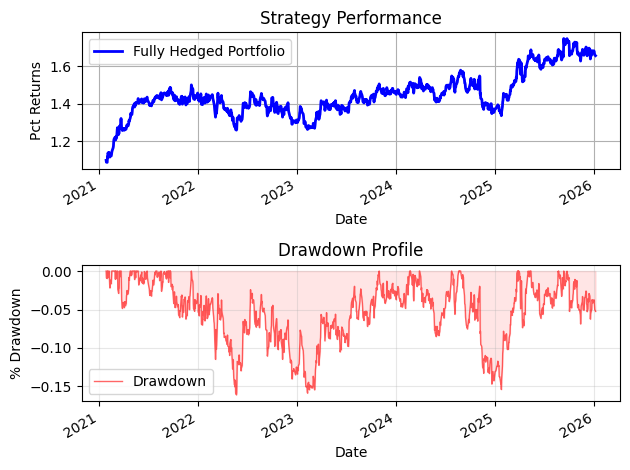

STRATEGY PERFORMANCE REPORT
Total Return:      65.63%
Annualized Sharpe: 0.72
Max Drawdown:      -16.09%


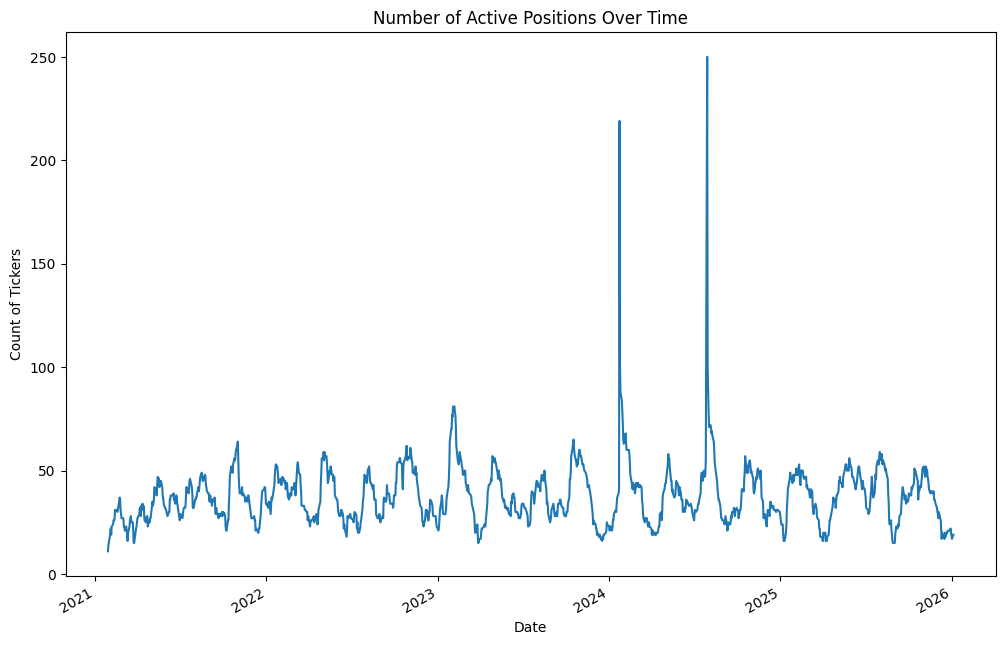

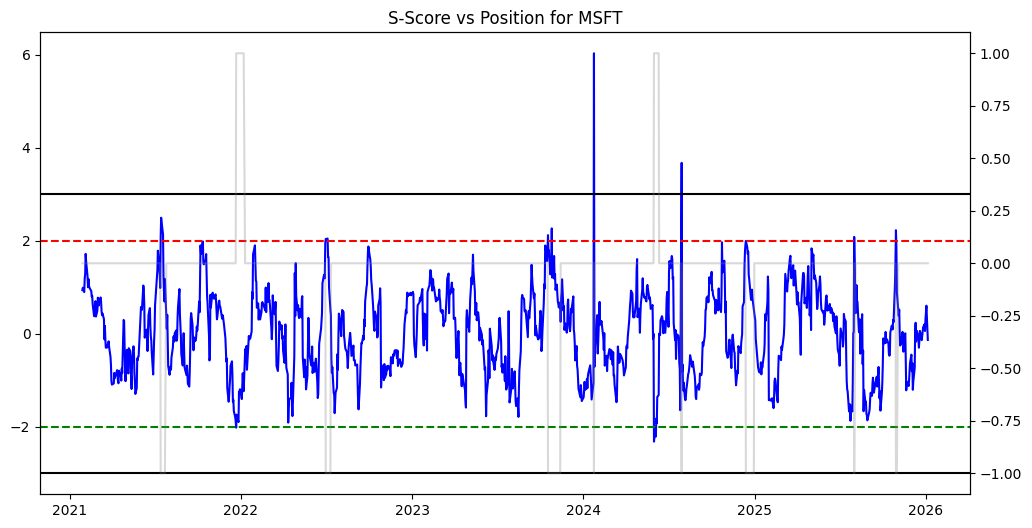

In [16]:
state_history, weight_history = gen_positions(S_score, Kappa, Sigma_eq)

# Normalize weights so we don't use infinite leverage
gross_leverage = weight_history.abs().sum(axis=1)
normalized_weights = weight_history.div(gross_leverage, axis=0).fillna(0)

leveraged_weights = normalized_weights * 3.0

cum_rets, daily_net_rets, daily_cum_rets = calculate_pnl(rets, Beta, Factor_rets, leveraged_weights)

performance_analysis(daily_net_rets, daily_cum_rets)

improvement_analysis(state_history, S_score)

In [ ]:
# Monte Carlo Simulations for Risk Assessment